<a href="https://colab.research.google.com/github/RonaldiVX1/Daun-Lidah-Buaya-and-Daun-Jambu-Biji-Classification-Using-ANN_-TA-_377_199/blob/main/Daun_Lidah_Buaya_and_Daun_Jambu_Biji_Classification_Using_ANN_(TA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modul Disusun Oleh : 


1.   Galih Wasis Wicaksono
2.   Ulfah Nur Oktaviana



# **ARTIFICIAL NEURAL NETWORK**

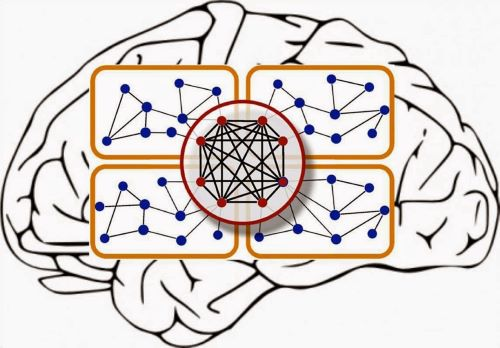



---
**Pengertian ANN (Artificial Neural Network)**

ANN atau biasa disebut juga sebagai Jaringan Syaraf Tiruan (JSS) yang terinspirasi dari jaringan syaraf pada otak manusia, merupakan salah satu algoritma yang biasanya digunakan untuk kasus klasifikasi. algoritma ini termasuk kedalam Supervised Learning sehingga membutuhkan label dan data latih untuk proses pelatihan nantinya. 

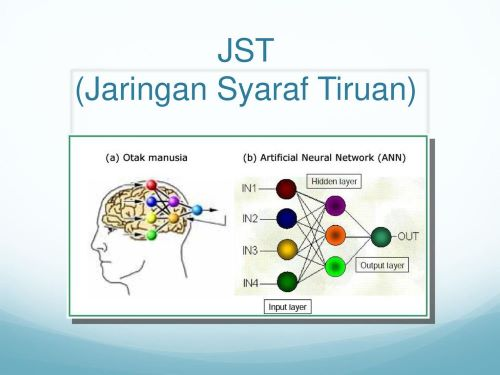









---
**ARSITEKTUR JARINGAN SYARAF TIRUAN**

ANN merupakan sistem komputasi yang terinspirasi dari jaringan syaraf otak. 



*   ANN didasarka pada kumpulan unit terhubung yang disebut arfitificial neuron atau neuron. 
*   setiap koneksi yang terjadi antar neuron dapat mengirimkan sinyal ke neuron lainnya. 


*   Neuron penerima memproses sinyal dan memberi sinyal pada neuron hilir yang terhubung dengannya.
*   Neuron diatur dalam sebuah Layer

1.   Input Layer
2.   Hidden Layer
3.   Output Layer

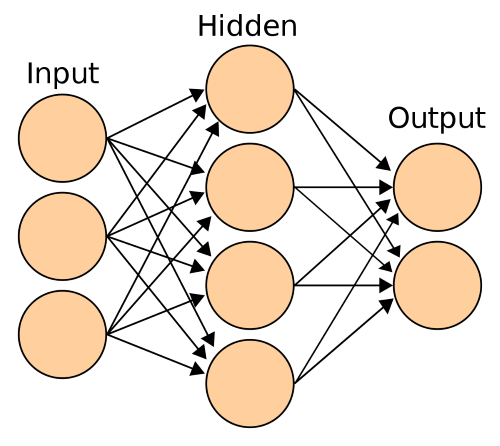






---
**LAYERS**
ANN terdiri atas beberapa layer yang berbeda. layer tersebut diantaranya : 

1.   Dense (Biasa dikenal sebagai Fully Connected Layer)
2.   Convolution Layers
3.   Pooling Layers
4.   Recurrent Layers
5.   Normalization Layers
6.   Many Others











---

**INPUT LAYERS**

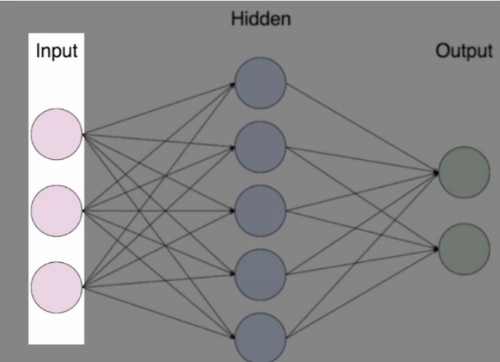



---

**PARAMETER**

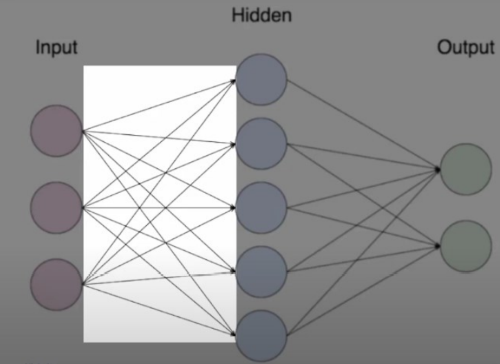



---
**WEIGHT**

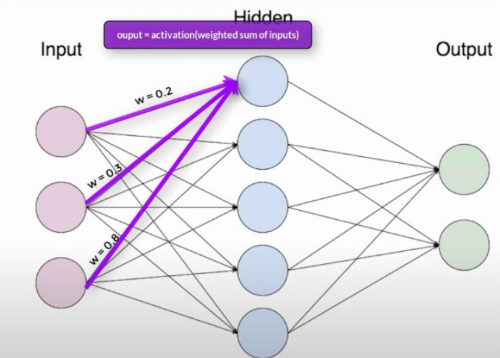



---

**HIDDEN LAYERS**

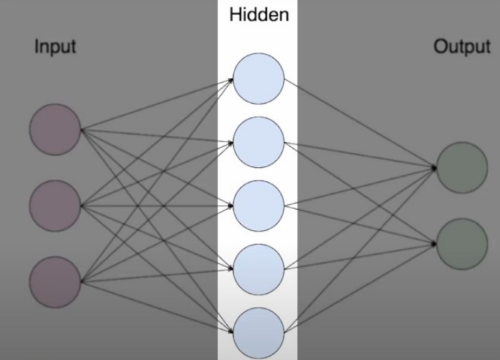



---

**OUTPUT LAYERS**

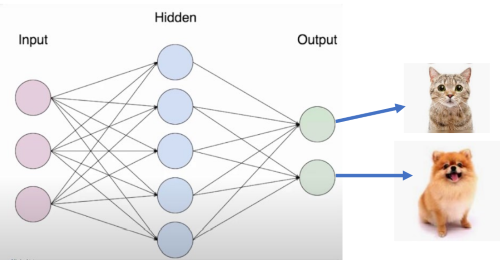

# 1. Download Dataset

In [1]:
# Mount Google Drive ==> tujuannya untuk menyimpan hasil, maupun mengambil file dari google drive untuk diolah
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# wubah direktori mengarah ke folder dimana dataste berada dengan menggunakan command %cd 

%cd /content/drive/MyDrive/TA Kecerdasan Buatan/Dataset

/content/drive/MyDrive/TA Kecerdasan Buatan/Dataset


In [4]:
# cek isi folder dari direktori saat ini
!ls

train  val


# 2. ANALYZE DATASET

In [5]:
# lakukan pengecekan terhadap jumlah data. dimana dalam kasus ini dataset telah dibagai menjadi 2 bagian 
# diantaranya : training set, dan validation set. 

import os

train_dir = "/content/drive/MyDrive/TA Kecerdasan Buatan/Dataset/train"
val_dir = "/content/drive/MyDrive/TA Kecerdasan Buatan/Dataset/val"

jambuBiji_train_path = train_dir + '/Jambu biji'
lidahBuaya_train_path = train_dir + '/Lidah buaya'
jambuBiji_val_path = val_dir + '/Jambu biji'
lidahBuaya_val_path = val_dir + '/Lidah buaya'

jambuBiji_len_train = len(os.listdir(jambuBiji_train_path))
lidahBuaya_len_train = len(os.listdir(lidahBuaya_train_path))
jambuBiji_len_val = len(os.listdir(jambuBiji_val_path))
lidahBuaya_len_val = len(os.listdir(lidahBuaya_val_path))

print("jumlah dataset Training : ", jambuBiji_len_train + lidahBuaya_len_train)
print("jumlah dataset validasi : ", jambuBiji_len_val + lidahBuaya_len_val)
print("\n\n")
print("jumlah train kelas jambu biji : ", jambuBiji_len_train)
print("jumlah train kelas lidah buaya : ", lidahBuaya_len_train)
print("jumlah validasi kelas jambu biji: ", jambuBiji_len_val)
print("jumlah validasi kelas lidah buaya : ", lidahBuaya_len_val)


jumlah dataset Training :  518
jumlah dataset validasi :  174



jumlah train kelas jambu biji :  259
jumlah train kelas lidah buaya :  259
jumlah validasi kelas jambu biji:  87
jumlah validasi kelas lidah buaya :  87


In [6]:
# lakukan pengecekan terhadap format nama dan ekstensi dari gambar
train_jambuBiji_fnames = os.listdir( jambuBiji_train_path )
train_lidahBuaya_fnames = os.listdir( lidahBuaya_train_path )

print(train_jambuBiji_fnames[:10])
print(train_lidahBuaya_fnames[:10])

['Jambu biji10.jpg', 'Jambu biji100.jpg', 'Jambu biji102.jpg', 'Jambu biji104.jpg', 'Jambu biji273.jpg', 'Jambu biji158.jpg', 'Jambu biji160.jpg', 'Jambu biji152.jpg', 'Jambu biji153.jpg', 'Jambu biji162.jpg']
['Lidah buaya256.jpg', 'Lidah buaya226.jpg', 'Lidah buaya222.jpg', 'Lidah buaya22.jpg', 'Lidah buaya21.jpg', 'Lidah buaya12.jpg', 'Lidah buaya3.jpg', 'Lidah buaya295.jpg', 'Lidah buaya291.jpg', 'Lidah buaya29.jpg']


untuk kedua kelas dataset Training berjumlah 2000 data, sedangkan dataset Validation berjumlah 1000 data. sekarang mari melihat gambar yang akan dilatih, pertama-tama import terlebih dahulu library yang dieprlukan

In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# parameter dari visualisasi dimana terdiri atas 4 baris dan 4 kolom
nrows = 4
ncols = 4

pic_index = 0 # inisialisasi nilai awal untuk melakukan iterasi

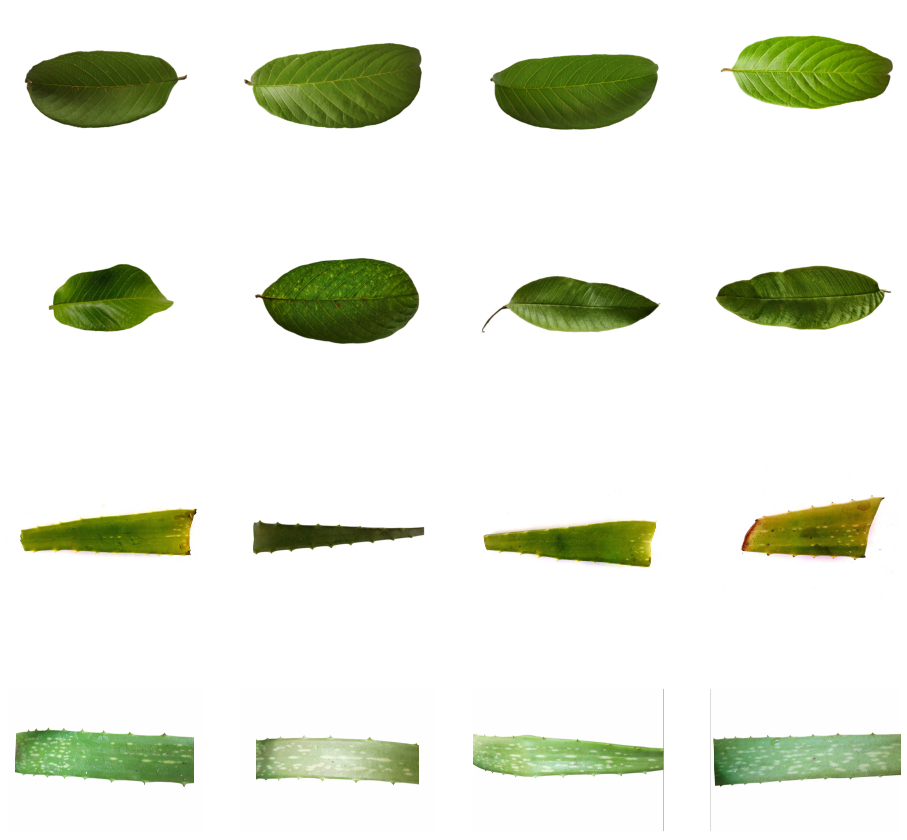

In [17]:
# mengatur matplotlib fig, dan ukuran visualisasi ke 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_jambuBiji_pix = [os.path.join(jambuBiji_train_path, fname) 
                for fname in train_jambuBiji_fnames[ pic_index-8:pic_index] 
               ]

next_lidahBuaya_pix = [os.path.join(lidahBuaya_train_path, fname) 
                for fname in train_lidahBuaya_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_jambuBiji_pix+next_lidahBuaya_pix):
  # menyeting subplot
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # tidak menampilkan axes (atau gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


dari gambar overview yang ditampilkan diatas dapat diambil informasi bahwa ukuran dari masing-masing gambar berbeda. oleh karenanya perlu disetarakan ke ukuran yang sama terlebih dahulu

# 3. DATA PREPROCESSING

mempersiapkan generator untuk melakukan 

*   preprocessing dataset. Pada kasus ini akan digunakan 2 jenis generator: generator pertama digunakan pada dataset Training, sedangkan generator kedua digunakan pada dataset validation. 
*   langkah pertama, adalah melakukan normalisasi pada piksel imagage. seperti yang telah diketahui image terdiri dari piksel-piksel yang memiliki range (0 hingga 255). dalam proses ini akan dilakukan normalisasi sehingga range pada piksel akan enjadi (0 hingga 1) dengan membagi piksel dengan angka 255.
*   menggunakan library Keras memungkinkan untuk melakukan normalisasi gambar secara keseluruhan dengan menggunakan keras.preprocessing.image.ImageDataGenerator dan menggunakan rescale parameter yang sudah terinclude didalamnya. 








In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# semua image akan di normalisasi dengan membagi 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images dalam 20 batches menggunakan train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=37,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images dalam 20 batches menggunakan test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(val_dir,
                                                         batch_size=29,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 518 images belonging to 2 classes.
Found 174 images belonging to 2 classes.


# Build Architecture Model

In [26]:
# import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [27]:
# Model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) 
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(200, activation='relu')(x)
x = layers.Dense(250, activation='relu')(x)
x = layers.Dense(150, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x) 


model = Model(img_input, output)

Noted : 


*   Flatten Layers ==> mengubah image yang sebelumnya berbentuk n-dimensi menjadi satu dimensi. 
*   Dense Layers ==>  Menambahkan Lapisan Neuron. setiap lapisan neuron membutuhkan fungsi aktivasi untuk memberitahu mereka apa yang harus dilakukan. salah satu fungsi aktivasi yang sering digunakan pada Dense Layer adalah ReLu
*   Relu ==> secara singkat berarti "Jika nilai X>0 maka mengembalikan X, jika sebaliknya maka mengembalikan nilai 0". jadi yang dilakukan pada dasarnya adalah meneruskan nilai 0 atau lebih besar ke layer berikutnya. 
*   Karena pada kasus ini adalah klasifikasi dua kelas maka arsitektur diakhiri dengan activation sigmoid, sehingga output dari jaringan/model akan menjadi skalar tunggal yaitu antara 0 dan 1 (dimana label 1 merupakan kelas yang berbeda dengan label 0)





In [28]:
# Print model summary
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_2 (Flatten)         (None, 67500)             0         
                                                                 
 dense_10 (Dense)            (None, 100)               6750100   
                                                                 
 dense_11 (Dense)            (None, 200)               20200     
                                                                 
 dense_12 (Dense)            (None, 250)               50250     
                                                                 
 dense_13 (Dense)            (None, 150)               37650     
                                                                 
 dense_14 (Dense)            (None, 1)                 151 

In [29]:
from tensorflow.keras.optimizers import RMSprop


Tahap berikutnya adalah Mendefinisikan model dan benar-benar membangunnya. pelatihan dimulai dengan mengkompilasi dengan beberapa fungsi optimizer dan loss. kemudian melatih dengan memanggil "model.fit". proses ini akan meminta proses pembelajaran untuk menyesuaikan training set dengan label gambar. dengan istilah lain adalah mencari hubungan diantara training set dan lebelnya. sehingga dimasa mendatang jika melakukan klasifikasi dengan data yang mirip dengan training set, maka model dapat mengklaisifikasi sesuai dengan label yang dihasilkan selama proses pelatihan model.


In [30]:
# Compile model

model.compile(optimizer=RMSprop(lr=1e-4), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [31]:
history = model.fit(
      train_generator,
      steps_per_epoch=14,  # images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=6,  #  images = batch_size * steps
)

Epoch 1/100
14/14 [==============================] - 61s 4s/step - loss: 1.2159 - acc: 0.5154 - val_loss: 0.6284 - val_acc: 0.5057
Epoch 2/100
14/14 [==============================] - 29s 2s/step - loss: 0.5858 - acc: 0.6911 - val_loss: 0.7277 - val_acc: 0.5057
Epoch 3/100
14/14 [==============================] - 29s 2s/step - loss: 0.4552 - acc: 0.7722 - val_loss: 0.1994 - val_acc: 0.9253
Epoch 4/100
14/14 [==============================] - 29s 2s/step - loss: 0.4297 - acc: 0.8147 - val_loss: 0.2404 - val_acc: 0.9483
Epoch 5/100
14/14 [==============================] - 29s 2s/step - loss: 0.2821 - acc: 0.8571 - val_loss: 0.2337 - val_acc: 0.9023
Epoch 6/100
14/14 [==============================] - 29s 2s/step - loss: 0.3489 - acc: 0.8707 - val_loss: 0.1195 - val_acc: 0.9828
Epoch 7/100
14/14 [==============================] - 29s 2s/step - loss: 0.2238 - acc: 0.9073 - val_loss: 0.1876 - val_acc: 0.9138
Epoch 8/100
14/14 [==============================] - 30s 2s/step - loss: 0.1858 - a

Setelah proses pelatihan selesai maka nilai accuracy (acc) akan terlihat, dimana nilai akurasi seperti 0.9315. hal ini memberitahu anda bahwa jaringan syaraf atau model yang dibuat sekitar 93% akurat dalam mengklasifikasikan data pelatihan (training set).  

# Model Evaluation




---
Langkah 1:

1.   Menggunakan Grafik Training & Validation 
2.   MENggunakan Grafik Training & Validation Loss


Text(0.5, 1.0, 'Training and validation loss')

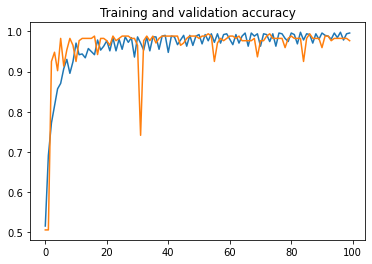

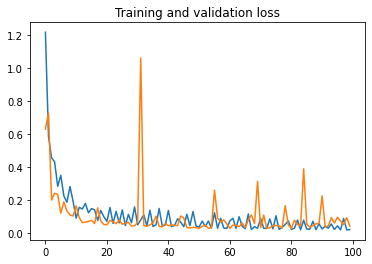

In [32]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )



---
Langkah 2 : Menggunakan Confusion Matrix


In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
sns.set(style='whitegrid')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Accuracy  : 0.4942528735632184
Precision : 0.4942498347653669
f1Score : 0.4941860465116279
[[42 45]
 [43 44]]


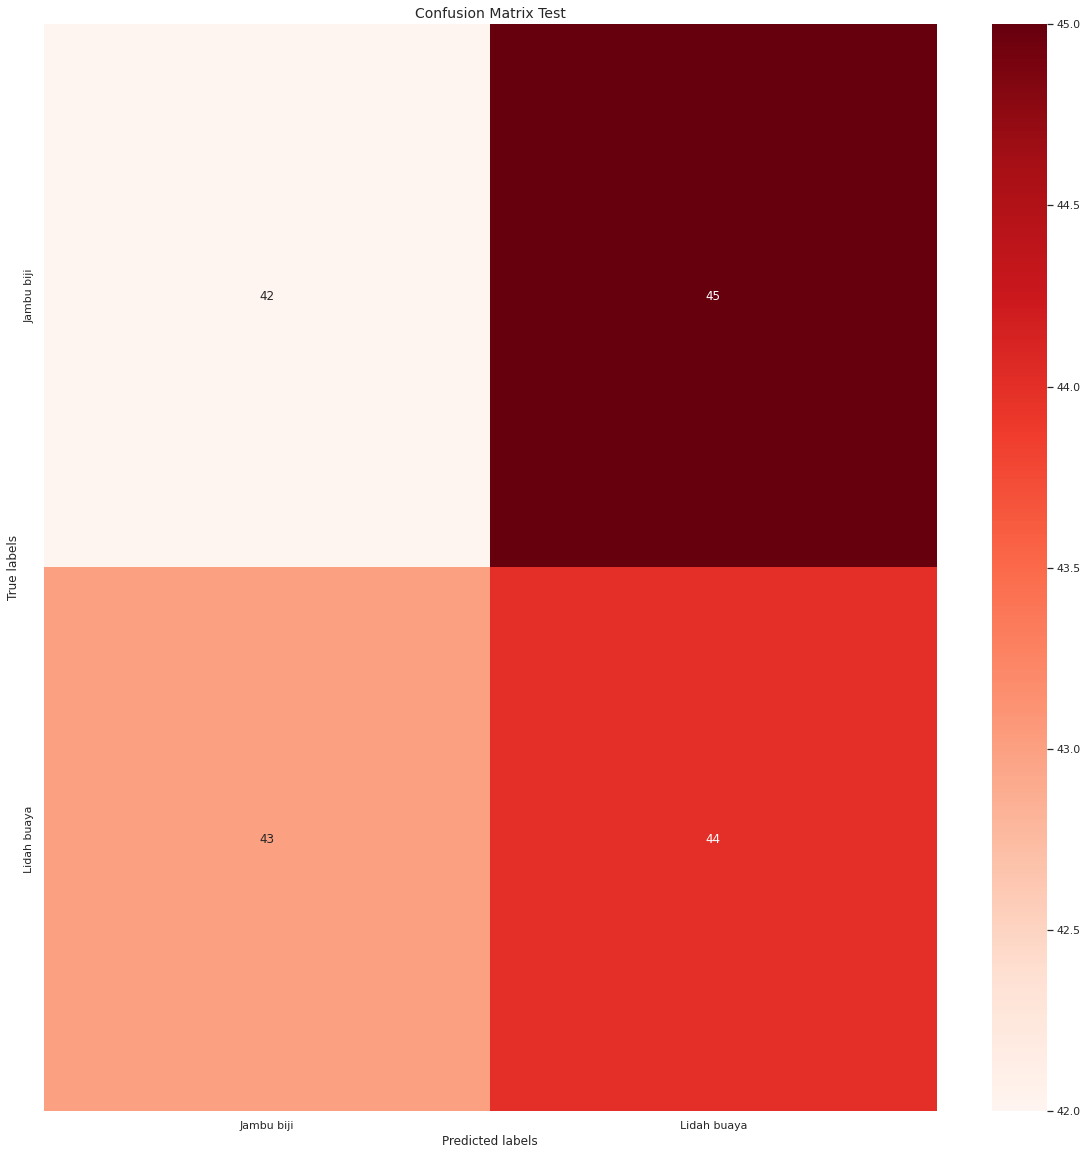

In [37]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score


predictions = model.predict_generator(generator=validation_generator)
yPredictions = predictions > 0.5
true_classes = validation_generator.classes
class_names = validation_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()




---
Langkah 3 : Menggunakan Classification Report


In [38]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

              precision    recall  f1-score   support

  Jambu biji       0.49      0.48      0.49        87
 Lidah buaya       0.49      0.51      0.50        87

    accuracy                           0.49       174
   macro avg       0.49      0.49      0.49       174
weighted avg       0.49      0.49      0.49       174



# Save Model & Load

In [39]:
model.save("/content/drive/MyDrive/TA Kecerdasan Buatan/model/Daun_Lidah_Buaya_and_Daun_Jambu_Biji_Classification_Using_ANN.h5")

In [40]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = "/content/drive/MyDrive/Kecerdasan Buatan/model/Daun_Lidah_Buaya_and_Daun_Jambu_Biji_Classification_Using_ANN.h5"
model = load_model(model_path)

In [42]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path= fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a Lidah Buaya")
    
  else:
    print(fn + " is a Jambu Biji")
 

Saving Jambu biji98.jpg to Jambu biji98 (1).jpg
Saving Jambu biji204.jpg to Jambu biji204 (1).jpg
Saving Jambu biji269.jpg to Jambu biji269 (1).jpg
Saving Jambu biji304.jpg to Jambu biji304 (1).jpg
Saving Lidah buaya98.jpg to Lidah buaya98 (1).jpg
Saving Lidah buaya204.jpg to Lidah buaya204 (1).jpg
Saving Lidah buaya269.jpg to Lidah buaya269 (1).jpg
Saving Lidah buaya304.jpg to Lidah buaya304 (1).jpg
[0.]
Jambu biji98.jpg is a Jambu Biji
[0.]
Jambu biji204.jpg is a Jambu Biji
[0.]
Jambu biji269.jpg is a Jambu Biji
[0.]
Jambu biji304.jpg is a Jambu Biji
[0.]
Lidah buaya98.jpg is a Jambu Biji
[1.]
Lidah buaya204.jpg is a Lidah Buaya
[1.]
Lidah buaya269.jpg is a Lidah Buaya
[1.]
Lidah buaya304.jpg is a Lidah Buaya
